# Preliminaries

In this notebook, we plot the CellRank robustness results, such as comparing #HVGs, subsetting the data.
We also plot the comparison between the deterministic and stochastic when pertubing #neighbors.

## Dependency notebooks

1. [analysis_notebooks/MK_2020-10-16_min_shared_counts.ipynb](analysis_notebooks/MK_2020-10-16_min_shared_counts.ipynb)
2. [analysis_notebooks/MK_2020-10-16_n_neighbors.ipynb](analysis_notebooks/MK_2020-10-16_n_neighbors.ipynb)
3. [analysis_notebooks/MK_2020-10-16_n_pcs.ipynb](analysis_notebooks/MK_2020-10-16_n_pcs.ipynb)
4. [analysis_notebooks/MK_2020-10-16_n_top_hvgs.ipynb](analysis_notebooks/MK_2020-10-16_n_top_hvgs.ipynb)
5. [analysis_notebooks/MK_2020-10-16_subset.ipynb](analysis_notebooks/MK_2020-10-16_subset.ipynb)

## Import packages

In [1]:
# import standard packages
from pathlib import Path
import sys
import os

import cloudpickle
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

# import single-cell packages
import cellrank as cr
import numpy as np

# import utilities
import analysis_notebooks.utils.utils as utils

## Print package versions for reproducibility

In [3]:
cr.logging.print_versions()

cellrank==1.0.0-rc.12 scanpy==1.6.0 anndata==0.7.4 numpy==1.19.2 numba==0.51.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.8.2 scvelo==0.2.2 pygam==0.8.0 matplotlib==3.3.2 seaborn==0.11.0


## Set up paths

In [4]:
sys.path.insert(0, "../..")  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, FIG_DIR

## Set global parameters

In [5]:
sns.set(font_scale=2.0)

In [11]:
root = DATA_DIR / "benchmarking" / "robustness_analysis"
roots = [root / "robustness",  # stochastic mode
         root / "robustness_fixed",  # stochastic mode
         root / "robustness_det",
         root / "robustness_det_fixed"]
names = ["stoch", "stoch_fixed", "det", "det_fixed"]

In [12]:
pretty_labels = {
    'n_neighbors.pickle': '#nearest neighbors',
    'min_shared_counts.pickle': 'min. shared counts',
    'n_top_hvgs.pickle': '#HVGs',
    'n_pcs.pickle': '#PCs',
    'subsampling.pickle': 'subsampling',
}

neighs = [roots[-1] / 'n_neighbors.pickle', roots[1] / 'n_neighbors.pickle']

## Define utility functions

In [17]:
def extract_min_max(dir_, fnames):
    vmin, vmax = np.inf, -np.inf
    for fname in fnames:
        path = dir_ / fname if dir_ is not None else fname
        with open(path, "rb") as fin:
            print(path)
            data = cloudpickle.load(fin)
            minn, maxx = utils.plot_correlation_map(data['data'],
                                                    barcodes_align=fname != "subsampling.pickle",
                                                    return_ranges=True,
                                                    axes=None)
            vmin, vmax = min(minn, vmin), max(maxx, vmax)
    
    return vmin, vmax

# Plot the results

## Plot the robustness results

This generates plots for the following combinations:
- deterministic mode with fixed terminal states
- deterministic mode with non-fixed terminal states
- stochastic mode with fixed terminal states
- stochastic mode with non-fixed terminal states

/home/marius.lange/server_home/robustness_cleaned/robustness/data/res_n_neighbors.pickle


TypeError: an integer is required (got type bytes)

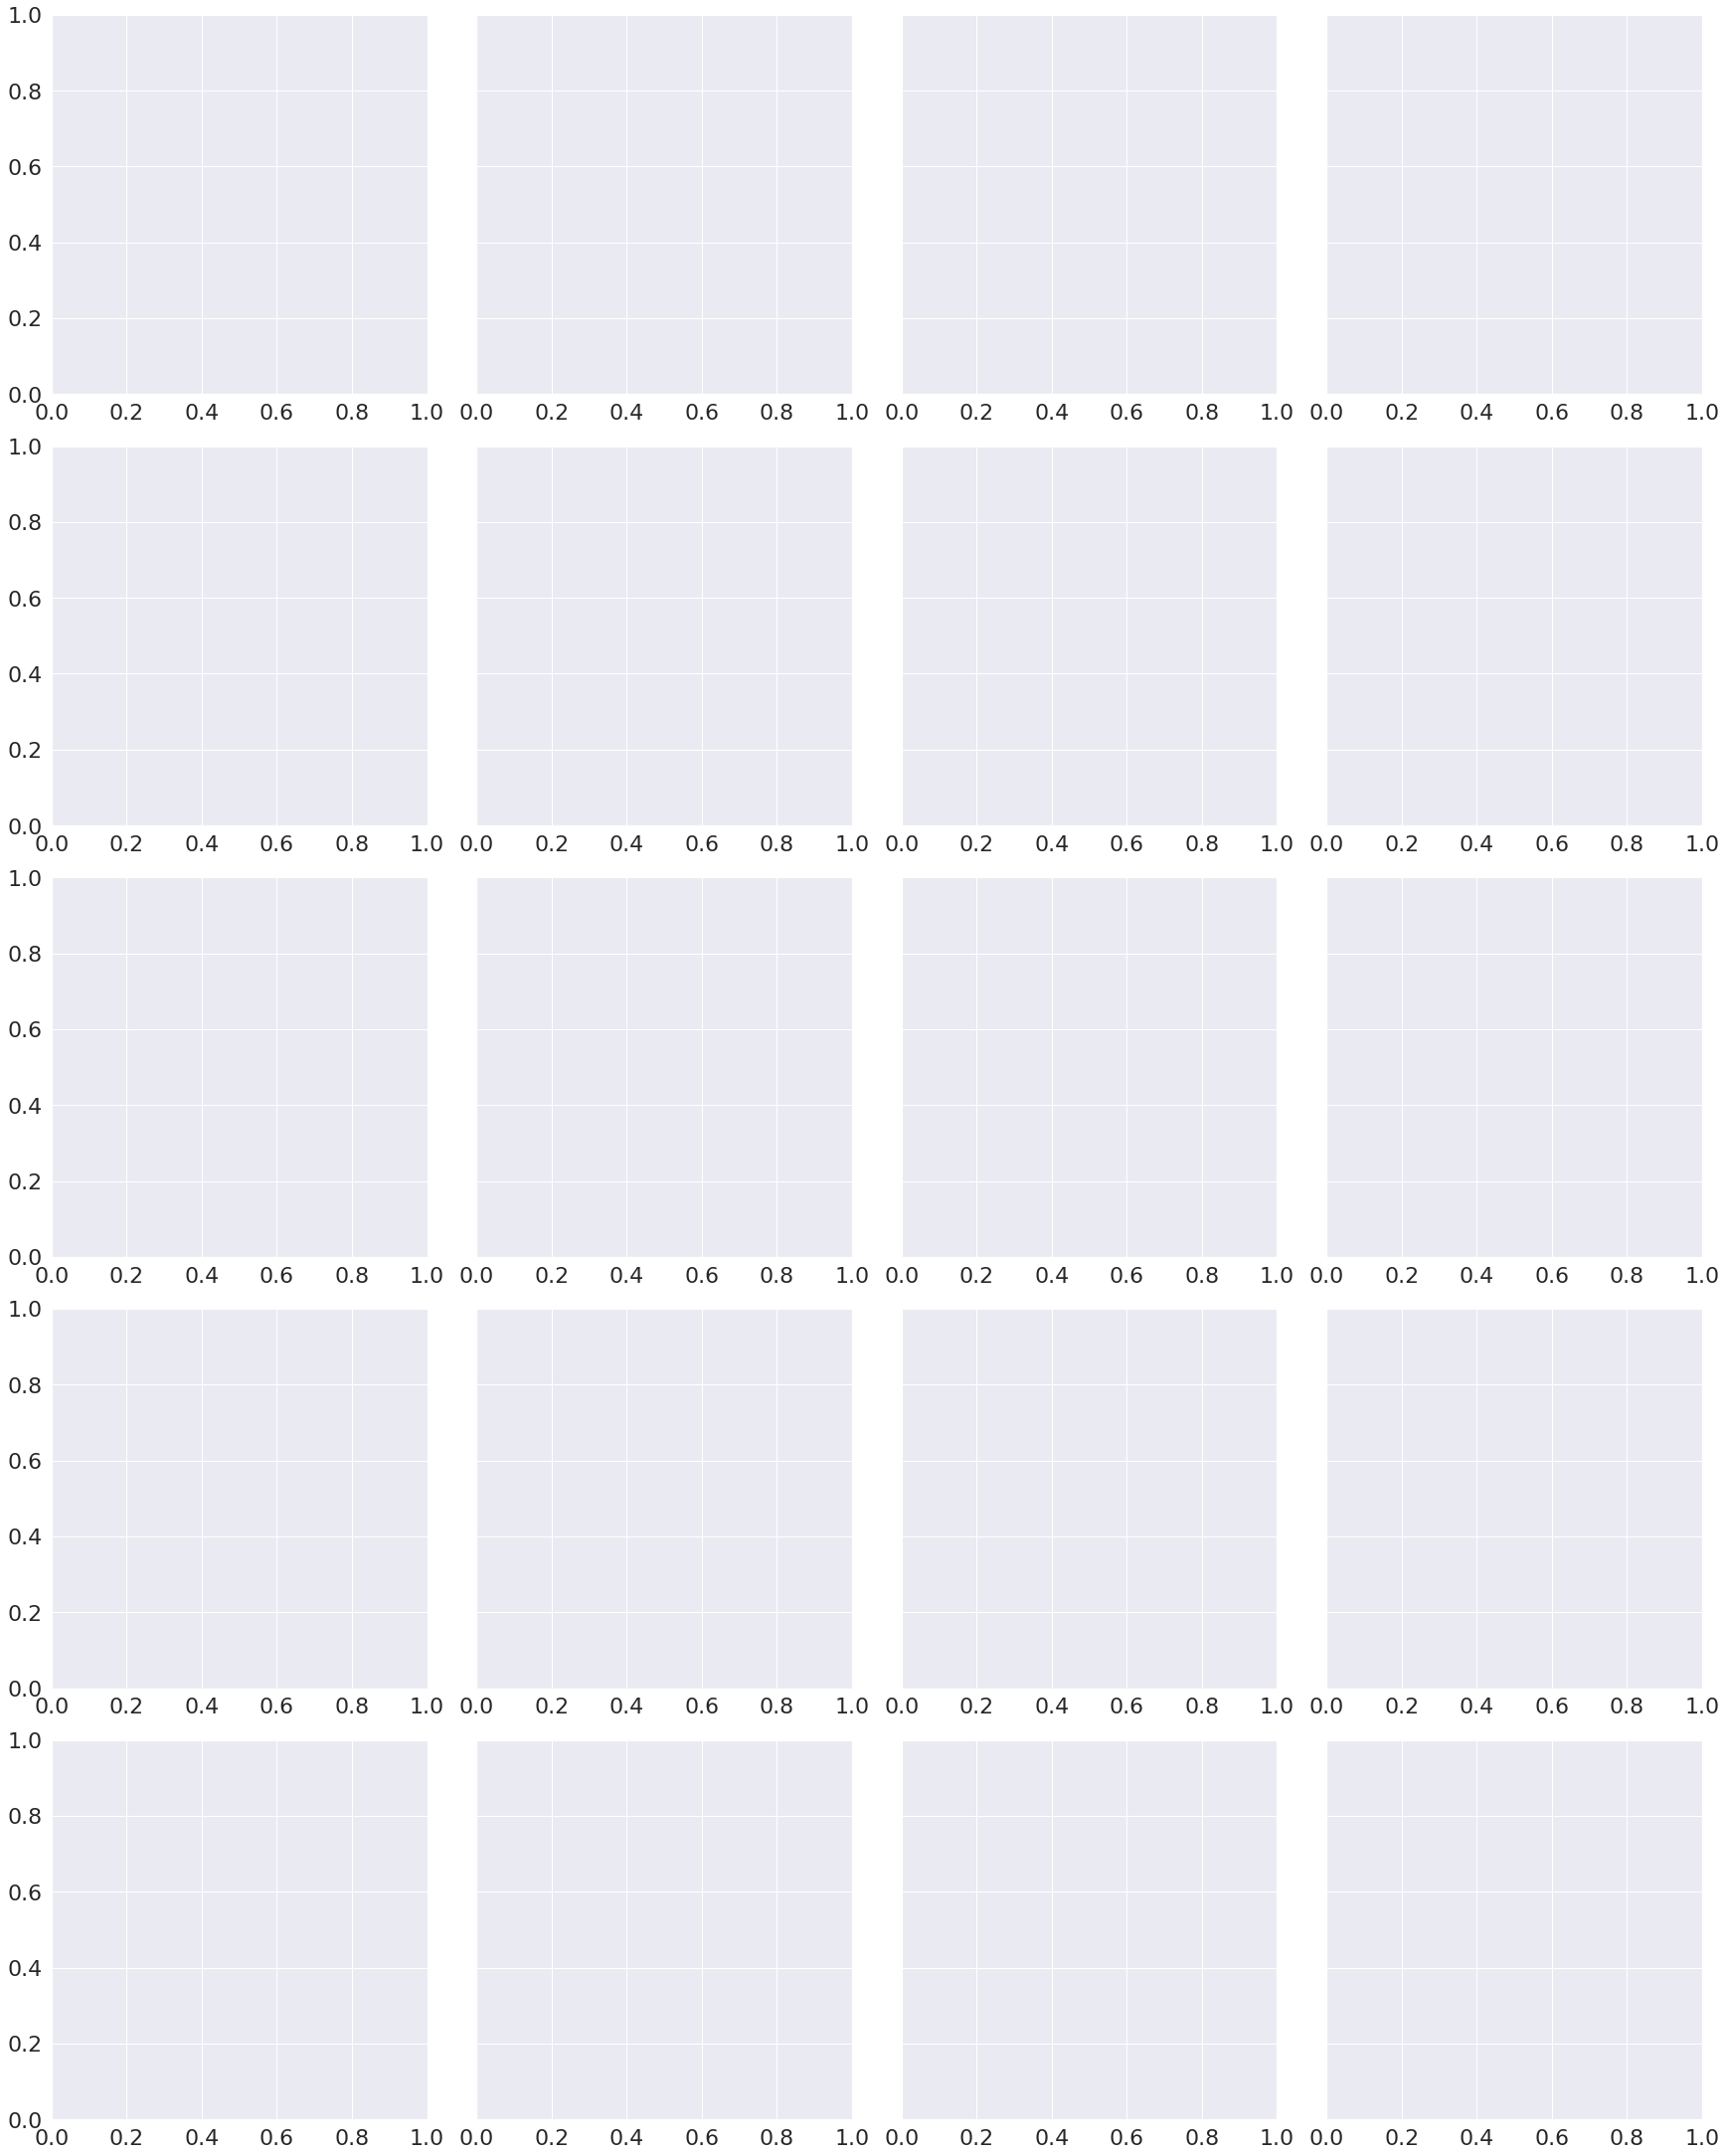

In [18]:
for name, root_ in zip(names, roots):
    dir_ = root_ / "data"
    fig, axess = plt.subplots(5, 4, figsize=(4 * 6, 5 * 6), constrained_layout=True, sharey="row")
    vmin, vmax = extract_min_max(dir_, pretty_labels.keys())
    
    print(dir_)
    for i, (fname, axes) in enumerate(zip(pretty_labels.keys(), axess)):
        with open(dir_ / fname, "rb") as fin:
            data = cloudpickle.load(fin)
            ylab = pretty_labels[fname]

            if fname == "subsampling.pickle":
                utils.plot_correlation_map(data['data'], barcodes_align=False,
                                           ylabel=ylab,
                                           ranges=(vmin, vmax),
                                           show_title=i==0,
                                           show_cbar=i==0,
                                           axes=axes, linewidths=1, linecolor="whitesmoke")
            else:
                utils.plot_correlation_map(data['data'],
                                           ylabel=ylab,
                                           ranges=(vmin, vmax),
                                           show_title=i==0,
                                           show_cbar=i==0,
                                           axes=axes, linewidths=0.1, linecolor="whitesmoke")
                
    fig.savefig(FIG_DIR / "suppl_fig_robustness" / f"figure_{name}.pdf", dpi=400,
                transparent=True, bbox_inches='tight')

## Plot det. vs stoch. mode for #neighbors

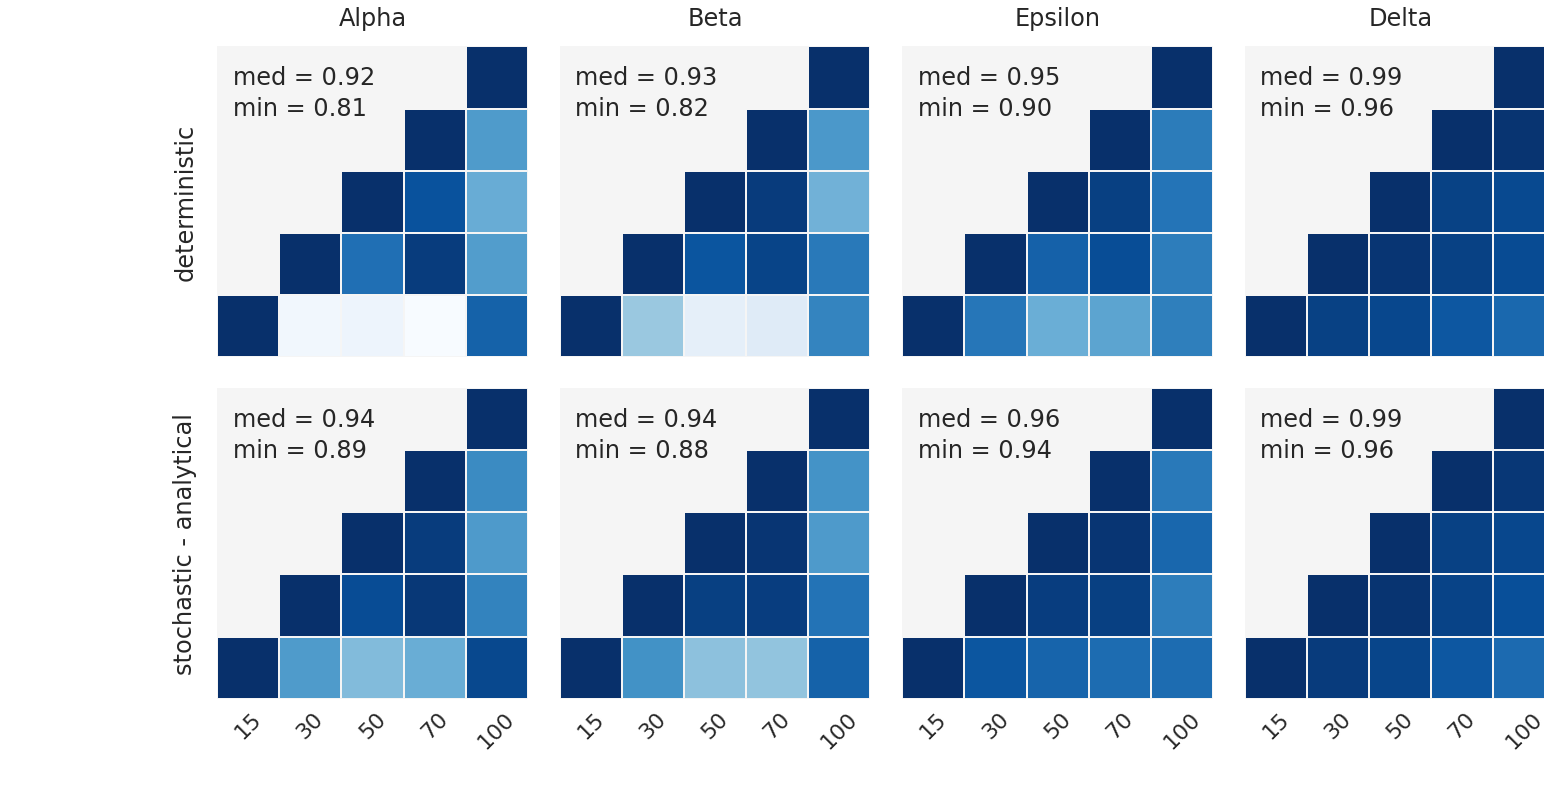

In [14]:
vmin, vmax = extract_min_max(None, neighs)
fig, axess = plt.subplots(2, 4, figsize=(4 * 6, 2 * 6), constrained_layout=True, sharey="row", sharex="col")
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, (fname, ylab, axes) in enumerate(zip(neighs, ["deterministic", "stochastic - analytical"], axess)):
    with open(fname, "rb") as fin:
        data = cloudpickle.load(fin)
        utils.plot_correlation_map(data['data'],
                                   ylabel=ylab,
                                   show_title=i==0,
                                   show_cbar=i==0,
                                   ranges=(vmin, vmax),
                                   axes=axes, linewidths=1, linecolor="whitesmoke")

fig.suptitle(f"varying {pretty_labels['n_neighbors.pickle']}")
fig.savefig(FIG_DIR / "suppl_fig_robustness" / "det_stoch_comp.pdf", dpi=400,
            transparent=True, bbox_inches='tight')